# 영화 관객수는 어떤것에 영향을 받나

## 패키지

In [891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [892]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

## 전처리

In [893]:
df = pd.read_excel('data/영화개봉.xlsx')

In [894]:
df.head(3)

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국,전국.1,전국.2,서울,서울.1,장르,등급,영화구분
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,스크린수,매출액,관객수,매출액,관객수,NaN,NaN,NaN
1,1.0,명량,김한민,(주)빅스톤픽쳐스,NaN,씨제이이앤엠(주),2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화
2,2.0,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",NaN,씨제이이앤엠(주),2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화


In [895]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16786 entries, 0 to 16785
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순번      16785 non-null  float64       
 1   영화명     16785 non-null  object        
 2   감독      16100 non-null  object        
 3   제작사     5896 non-null   object        
 4   수입사     11506 non-null  object        
 5   배급사     16226 non-null  object        
 6   개봉일     16775 non-null  datetime64[ns]
 7   영화유형    16785 non-null  object        
 8   영화형태    16784 non-null  object        
 9   국적      16784 non-null  object        
 10  전국      16786 non-null  object        
 11  전국.1    16664 non-null  object        
 12  전국.2    16786 non-null  object        
 13  서울      16658 non-null  object        
 14  서울.1    16786 non-null  object        
 15  장르      16705 non-null  object        
 16  등급      16769 non-null  object        
 17  영화구분    16785 non-null  object        
dtypes: dat

In [896]:
df1 = pd.read_excel('data/영화정보.xlsx')

In [897]:
df1.head(3)

,영화명,영화명(영문),제작연도,제작국가,유형,장르,제작상태,감독,제작사
0,엽기적인 그녀,My Sassy Girl,2001.0,한국,장편,코미디,개봉,곽재용,(주)신씨네
1,이웃사촌,Best Friend,2020.0,한국,장편,"드라마,코미디",개봉,이환경,"(주)시네마허브,환타지엔터테인먼트"
2,다시 만난 날들,Da Capo,2019.0,한국,장편,"뮤지컬,드라마,멜로/로맨스",개봉,심찬양,(주)푸른나무픽쳐스


In [898]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18072 entries, 0 to 18071
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      18072 non-null  object 
 1   영화명(영문)  15325 non-null  object 
 2   제작연도     17494 non-null  float64
 3   제작국가     18039 non-null  object 
 4   유형       18069 non-null  object 
 5   장르       17879 non-null  object 
 6   제작상태     17927 non-null  object 
 7   감독       16427 non-null  object 
 8   제작사      5966 non-null   object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [899]:
movie.columns

Index(['순번', '영화명', '감독_x', '제작사_x', '수입사', '배급사', '개봉일', '영화유형', '영화형태', '국적',
       '전국', '전국.1', '전국.2', '서울', '서울.1', '장르_x', '등급', '영화구분', '영화명(영문)',
       '제작연도', '제작국가', '유형', '장르_y', '제작상태', '감독_y', '제작사_y'],
      dtype='object')

In [900]:
movie = pd.merge(df,df1,how='outer',on='영화명')
movie.drop(['순번','감독_y','제작사_y','배급사','영화유형','영화형태','전국.1','서울','서울.1','장르_x','영화구분','제작연도','유형','제작상태','영화명(영문)','제작국가','수입사'],axis=1,inplace=True)

In [901]:
movie.head(3)

,영화명,감독_x,제작사_x,개봉일,국적,전국,전국.2,등급,장르_y
0,NaN,NaN,NaN,NaT,NaN,스크린수,관객수,NaN,NaN
1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,한국,1587,17613682,15세이상관람가,"사극,액션"
2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",2019-01-23,한국,1978,16264944,15세이상관람가,코미디


In [902]:
movie.rename(columns={'감독_x':'감독','제작사_x':'제작사','국적':'국가','전국':'스크린수','전국.2':'관객수','장르_y':'장르'},inplace=True)

In [903]:
movie.drop(0,inplace=True)

In [904]:
movie.isnull().sum()

영화명         0
감독       2330
제작사     13151
개봉일      1564
국가       1555
스크린수     1554
관객수      1554
등급       1578
장르        475
dtype: int64

In [905]:
movie = movie.dropna()

In [906]:
movie.head(3)

,영화명,감독,제작사,개봉일,국가,스크린수,관객수,등급,장르
1,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,한국,1587,17613682,15세이상관람가,"사극,액션"
2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",2019-01-23,한국,1978,16264944,15세이상관람가,코미디
3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",2017-12-20,한국,1912,14410754,12세이상관람가,"판타지,드라마"


In [907]:
movie.drop('제작사',axis=1,inplace=True)

In [908]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968 entries, 1 to 17746
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     5968 non-null   object        
 1   감독      5968 non-null   object        
 2   개봉일     5968 non-null   datetime64[ns]
 3   국가      5968 non-null   object        
 4   스크린수    5968 non-null   object        
 5   관객수     5968 non-null   object        
 6   등급      5968 non-null   object        
 7   장르      5968 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 419.6+ KB


In [909]:
movie = movie.astype({'스크린수':'int','관객수':'int'})

In [910]:
movie.rename(columns={'등급':'관람가'},inplace=True)

In [911]:
movie.head(3)

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상관람가,"사극,액션"
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상관람가,코미디
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상관람가,"판타지,드라마"


In [912]:
movie.관람가.unique()

array(['15세이상관람가', '12세이상관람가', '12세관람가', '15세관람가', '청소년관람불가', '18세관람가',
       '전체관람가', '12세이상관람가,12세관람가', '15세관람가,15세이상관람가', '18세관람가,청소년관람불가',
       '12세이상관람가,전체관람가', '청소년관람불가,15세이상관람가', '제한상영가',
       '모든 관람객이 관람할 수 있는 등급', '18세 미만인 자는 관람할 수 없는 등급',
       '12세 미만인 자는 관람할 수 없는 등급'], dtype=object)

In [913]:
movie.관람가 = movie.관람가.replace({'12세 미만인 자는 관람할 수 없는 등급':'12세이상관람가','모든 관람객이 관람할 수 있는 등급':'전체관람가','18세 미만인 자는 관람할 수 없는 등급':'18세이상관람가'})
movie.관람가 = movie.관람가.replace({'청소년관람불가':'19세이상관람가','12세이상관람가,12세관람가':'12세이상관람가','15세관람가,15세이상관람가':'15세이상관람가'})
movie.관람가 = movie.관람가.replace({'15세관람가':'15세이상관람가','18세관람가,청소년관람불가':'18세이상관람가','18세관람가':'18세이상관람가','12세이상관람가,전체관람가':'전체관람가','청소년관람불가,15세이상관람가':'15세이상관람가'})
movie.관람가 = movie.관람가.apply(lambda x:x.split('관')[0])

In [914]:
movie[movie.관람가 == '제한상영가']

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르
8384,허스,김정중,2007-08-02,한국,0,597,제한상영가,"드라마,멜로/로맨스"


In [915]:
movie.drop(8384,axis=0,inplace=True)

In [916]:
movie.관람가 = movie.관람가.apply(lambda x:x.split('관')[0])

In [917]:
movie.head(3)

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르
1,명량,김한민,2014-07-30,한국,1587,17613682,15세이상,"사극,액션"
2,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상,코미디
3,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상,"판타지,드라마"


In [918]:
movie.장르 = movie.장르.apply(lambda x:x.split(',')[0])

In [919]:
movie['개봉연도'] = movie.개봉일.dt.year
movie['개봉달'] = movie.개봉일.dt.month

In [920]:
movie.loc[(movie['관객수'] >= 10000000),'등급'] = '1'
movie.loc[(movie['관객수'] <= 10000000) & (movie['관객수'] >= 5000000),'등급'] = '2'
movie.loc[(movie['관객수'] <= 5000000) & (movie['관객수'] >= 1000000),'등급'] = '3'
movie.loc[(movie['관객수'] <= 1000000) & (movie['관객수'] >= 100000),'등급'] = '4'
movie.loc[(movie['관객수'] <= 100000) & (movie['관객수'] >= 1),'등급'] = '5'

In [921]:
movie.drop_duplicates(['관객수'],keep='first',inplace=True)

In [922]:
movie = pd.merge(movie3,movie4,how='outer',on='관객수')

In [923]:
movie3.drop_duplicates(['관객수'],keep='first')

,영화명,감독,개봉일,국가,스크린수,관객수,관람가,장르,개봉연도,개봉달,등급,index_x,index_y
0,명량,김한민,2014-07-30,한국,1587,17613682,15세이상,사극,2014,7,1,1,0
1,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상,코미디,2019,1,1,2,1
2,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상,판타지,2017,12,1,3,2
3,국제시장,윤제균,2014-12-17,한국,966,14245998,12세이상,드라마,2014,12,1,4,3
4,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,미국,2835,13934592,12세이상,액션,2019,4,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,이니셜 D,"유위강,맥조휘",2006-03-01,홍콩,0,10036,15세이상,액션,2006,3,5,4994,4284
4285,나의 어머니,난니 모레티,2015-08-20,이탈리아,30,10031,12세이상,드라마,2015,8,5,4995,4285
4286,타이페이 카페 스토리,샤오 야 췐,2011-07-07,대만,10,10023,전체,드라마,2011,7,5,4996,4286
4287,글로리아 벨,세바스찬 렐리오,2019-06-06,미국,48,10021,15세이상,드라마,2019,6,5,4998,4287


In [924]:
movie4 = movie3.관객수.reset_index()

In [925]:
movie.drop(['index_x','index_y'],axis=1,inplace=True)

In [926]:
movie = movie.rename(columns={'index':'순위','개봉일':'개봉','개봉달':'개봉월'})
movie

,영화명,감독,개봉,국가,스크린수,관객수,관람가,장르,개봉연도,개봉월,등급,순위
0,명량,김한민,2014-07-30,한국,1587,17613682,15세이상,사극,2014,7,1,0
1,극한직업,이병헌,2019-01-23,한국,1978,16264944,15세이상,코미디,2019,1,1,1
2,신과함께-죄와 벌,김용화,2017-12-20,한국,1912,14410754,12세이상,판타지,2017,12,1,2
3,국제시장,윤제균,2014-12-17,한국,966,14245998,12세이상,드라마,2014,12,1,3
4,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,미국,2835,13934592,12세이상,액션,2019,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4284,이니셜 D,"유위강,맥조휘",2006-03-01,홍콩,0,10036,15세이상,액션,2006,3,5,4284
4285,나의 어머니,난니 모레티,2015-08-20,이탈리아,30,10031,12세이상,드라마,2015,8,5,4285
4286,타이페이 카페 스토리,샤오 야 췐,2011-07-07,대만,10,10023,전체,드라마,2011,7,5,4286
4287,글로리아 벨,세바스찬 렐리오,2019-06-06,미국,48,10021,15세이상,드라마,2019,6,5,4287


In [927]:
movie = movie[['순위','영화명','감독','국가','스크린수','관객수','장르','관람가','등급','개봉','개봉연도','개봉월']]

In [928]:
movie.순위 = movie.순위.apply(lambda x:x+1)

In [929]:
movie

,순위,영화명,감독,국가,스크린수,관객수,장르,관람가,등급,개봉,개봉연도,개봉월
0,1,명량,김한민,한국,1587,17613682,사극,15세이상,1,2014-07-30,2014,7
1,2,극한직업,이병헌,한국,1978,16264944,코미디,15세이상,1,2019-01-23,2019,1
2,3,신과함께-죄와 벌,김용화,한국,1912,14410754,판타지,12세이상,1,2017-12-20,2017,12
3,4,국제시장,윤제균,한국,966,14245998,드라마,12세이상,1,2014-12-17,2014,12
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",미국,2835,13934592,액션,12세이상,1,2019-04-24,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4284,4285,이니셜 D,"유위강,맥조휘",홍콩,0,10036,액션,15세이상,5,2006-03-01,2006,3
4285,4286,나의 어머니,난니 모레티,이탈리아,30,10031,드라마,12세이상,5,2015-08-20,2015,8
4286,4287,타이페이 카페 스토리,샤오 야 췐,대만,10,10023,드라마,전체,5,2011-07-07,2011,7
4287,4288,글로리아 벨,세바스찬 렐리오,미국,48,10021,드라마,15세이상,5,2019-06-06,2019,6


In [930]:
movie[movie.duplicated(['영화명'])]

,순위,영화명,감독,국가,스크린수,관객수,장르,관람가,등급,개봉,개봉연도,개봉월
83,84,숨바꼭질,존 폴슨,미국,0,779200,스릴러,15세이상,4,2005-02-25,2005,2
104,105,미녀와 야수,크리스토프 갱스,프랑스,387,315348,멜로/로맨스,전체,4,2014-06-18,2014,6
114,115,마스터,폴 토마스 앤더슨,미국,38,33505,액션,19세이상,5,2013-07-11,2013,7
193,194,귀향,페드로 알모도바르,스페인,0,26830,드라마,15세이상,5,2006-09-21,2006,9
207,208,스파이,폴 페이그,미국,665,2315882,액션,15세이상,3,2015-05-21,2015,5
345,346,히트맨,자비에르 젠스,미국,0,170240,코미디,19세이상,4,2007-11-29,2007,11
495,496,나를 찾아줘,김승우,한국,875,645082,스릴러,15세이상,4,2019-11-27,2019,11
612,613,잃어버린 세계를 찾아서,크리스 버틀러,미국,279,21252,애니메이션,전체,5,2019-10-09,2019,10
710,711,몬스터 하우스,피터 레페니오티스,캐나다,202,63784,애니메이션,전체,5,2019-10-03,2019,10
831,832,내 사랑,에이슬링 월쉬,아일랜드,233,334423,드라마,12세이상,4,2017-07-12,2017,7


In [931]:
movie['영화명2'] = movie[movie.국가 != '한국'].영화명 + ('(외국)') 

In [932]:
movie['영화명'] = np.where(pd.notnull(movie['영화명2']) == True, movie['영화명2'],movie['영화명'])

In [933]:
movie.drop('영화명2',axis=1,inplace=True)

In [934]:
movie['영화명1'] = movie[(movie.영화명.duplicated()) & (movie.국가 != '한국')].영화명 +('(외)')

In [951]:
# movie영화명1 = movie.영화명1.apply(lambda x:x.split('(외국)')[0] +('(외)'))

In [937]:
movie['영화명'] = np.where(pd.notnull(movie['영화명1']) == True, movie['영화명1'],movie['영화명'])

In [938]:
movie[movie.영화명.duplicated()]

,순위,영화명,감독,국가,스크린수,관객수,장르,관람가,등급,개봉,개봉연도,개봉월,영화명1
3094,3095,비상,박정훈,한국,160,29223,액션,19세이상,5,2009-12-03,2009,12,NaN


In [939]:
movie[movie.영화명 == '비상']

,순위,영화명,감독,국가,스크린수,관객수,장르,관람가,등급,개봉,개봉연도,개봉월,영화명1
3093,3094,비상,임유철,한국,0,39072,액션,전체,5,2006-12-14,2006,12,NaN
3094,3095,비상,박정훈,한국,160,29223,액션,19세이상,5,2009-12-03,2009,12,NaN


In [940]:
movie.loc[(movie.순위 == 3094),'영화명'] = '비상(1)'

In [941]:
movie[movie.영화명.duplicated()]

,순위,영화명,감독,국가,스크린수,관객수,장르,관람가,등급,개봉,개봉연도,개봉월,영화명1


In [942]:
movie.drop('영화명1',axis=1,inplace=True)

In [943]:
movie = movie.astype({'등급':'int'})

In [ ]:
movie.to_csv('data/최종영화.csv')

In [944]:
movie.관객수.mean()

711421.1678712986

In [945]:
movie.loc[(movie.관객수 >= 5000000),'흥행'] = '500만이상'

In [946]:
movie.loc[(movie.관객수 <= 5000000),'흥행'] = '500만이하'

In [947]:
movie.drop('등급',axis=1,inplace=True)

In [948]:
movie.loc[(movie.관람가 == '18세'), '관람가'] = '18세이상'

In [949]:
movie.head(3)

,순위,영화명,감독,국가,스크린수,관객수,장르,관람가,개봉,개봉연도,개봉월,흥행
0,1,명량,김한민,한국,1587,17613682,사극,15세이상,2014-07-30,2014,7,500만이상
1,2,극한직업,이병헌,한국,1978,16264944,코미디,15세이상,2019-01-23,2019,1,500만이상
2,3,신과함께-죄와 벌,김용화,한국,1912,14410754,판타지,12세이상,2017-12-20,2017,12,500만이상


# 각 컬럼간의 상관관계 확인

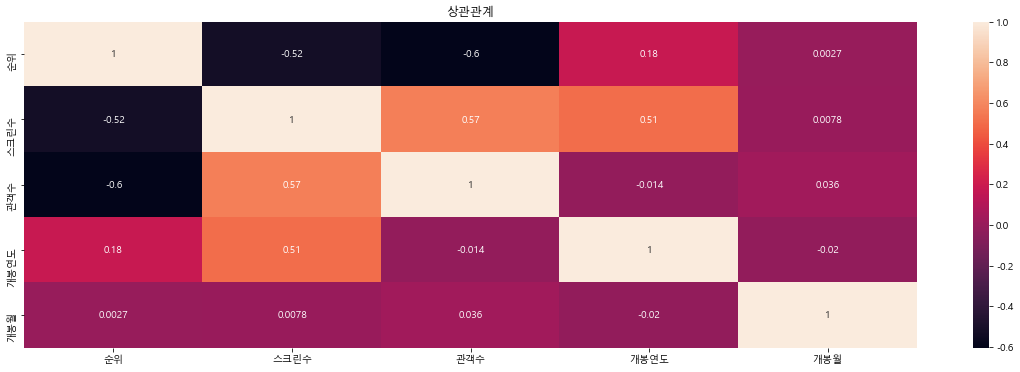

In [317]:
plt.figure(figsize=(20,6))
plt.title('상관관계')
sns.heatmap(movie.corr(),annot=True)
pass

## 흥행확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


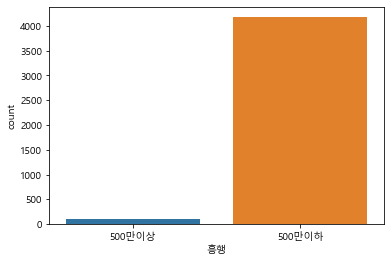

In [507]:
sns.countplot(movie.흥행)
pass

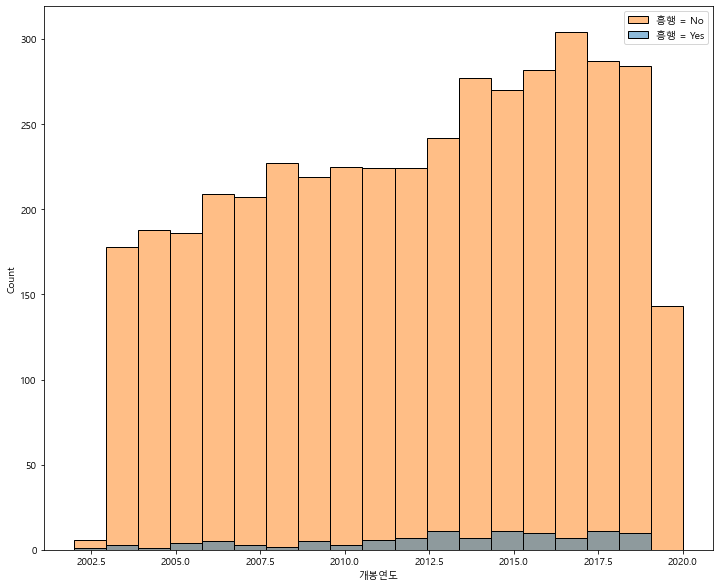

In [950]:
plt.figure(figsize=(12,10))
sns.histplot(x='개봉연도',hue='흥행',data=movie)
plt.legend(['흥행 = No','흥행 = Yes'])

In [530]:
# 500만이상 작품이 생각보다 작아서 500만이상인 데이터들로 시각화

In [594]:
# mo500 = movie[movie.흥행 == '500만이상']
# fig,ax = plt.subplot(2,3,figsize=(16,10))
# sns.countplot(mo500.개봉연도,hue=mo500.흥행,ax=ax[0][0])
# sns.countplot(mo500.국가,hue=mo500.흥행,ax=ax[0][1])
# sns.countplot(mo500.장르,hue=mo500.흥행,ax=ax[0][2])
# sns.countplot(mo500.관람가,hue=mo500.흥행,ax=ax[1][0])
# sns.countplot(mo500.개봉월,hue=mo500.흥행,ax=ax[1][1])
# plt.xticks(rotation=50)
# pass

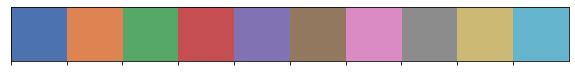

In [590]:
palette1 = sns.color_palette('deep',10)
sns.palplot(palette1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


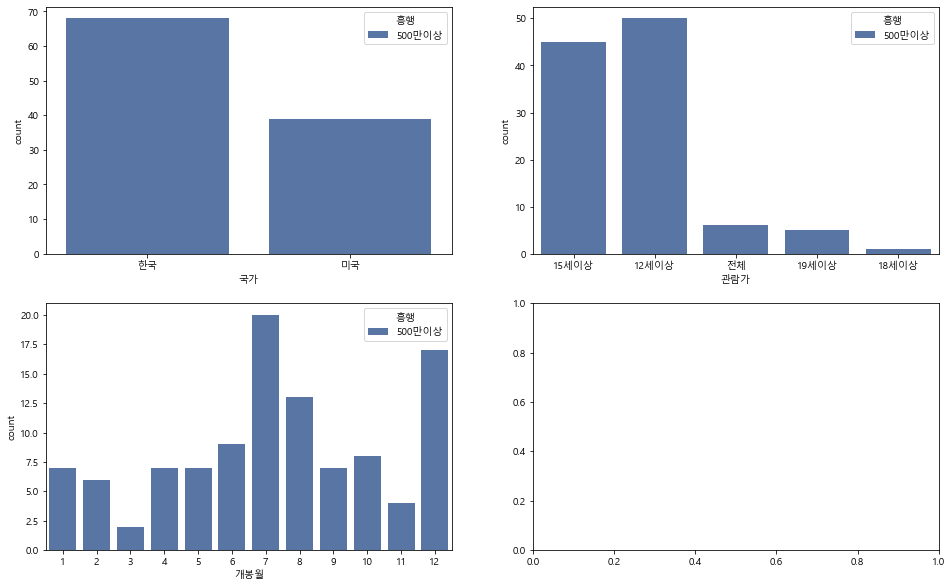

In [592]:
fig,ax = plt.subplots(2,2,figsize=(16,10))
sns.countplot(mo500.국가, hue = mo500.흥행,ax=ax[0][0],palette=palette1) 
sns.countplot(mo500.관람가, hue = mo500.흥행,ax=ax[0][1],palette=palette1)
sns.countplot(mo500.개봉월, hue = mo500.흥행,ax=ax[1][0],palette =palette1)
pass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


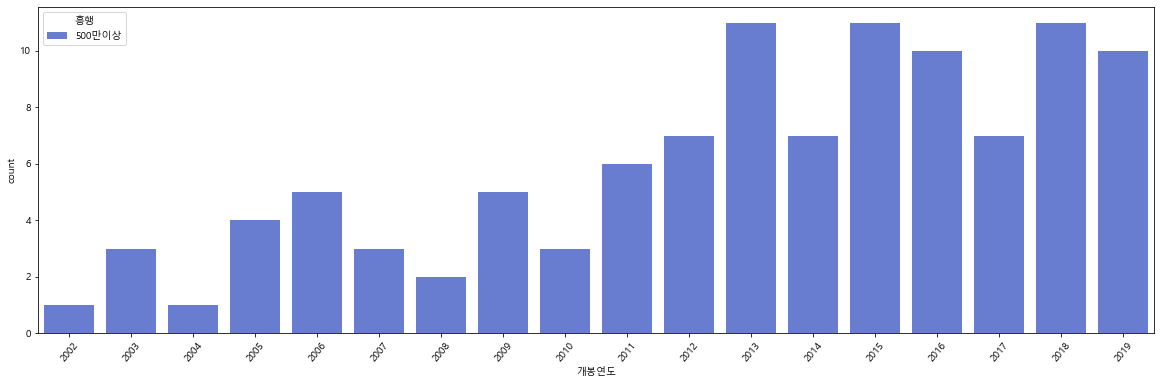

In [589]:
plt.figure(figsize=(20,6))
sns.countplot(mo500.개봉연도,hue=mo500.흥행,palette=palette1)
plt.xticks(rotation=50)
pass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


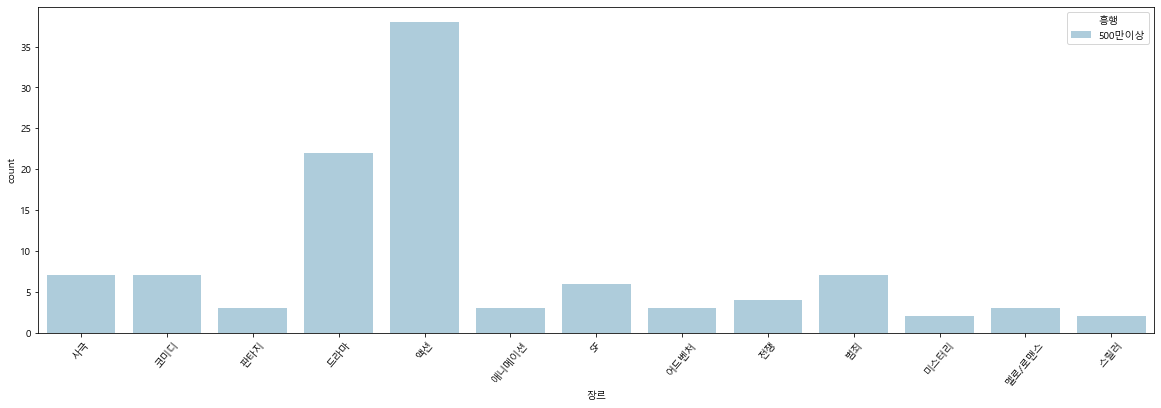

In [597]:
plt.figure(figsize=(20,6))
sns.countplot(mo500.장르,hue=mo500.흥행,palette='Paired')
plt.xticks(rotation=50)
pass

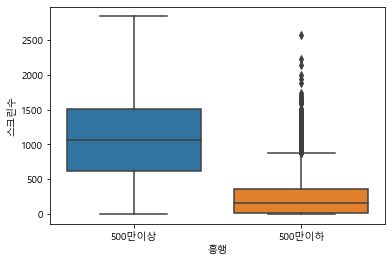

In [612]:
# 스크린수 흥행
sns.boxplot(x = movie.흥행,y=movie.스크린수)
pass

## 각 컬럼들 관객수관계

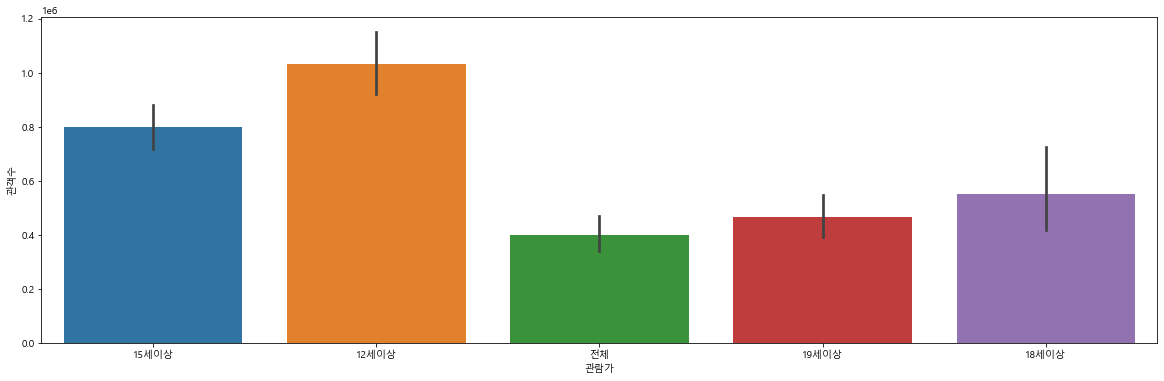

In [595]:
# 관람가 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie.관람가,y=movie.관객수)
pass

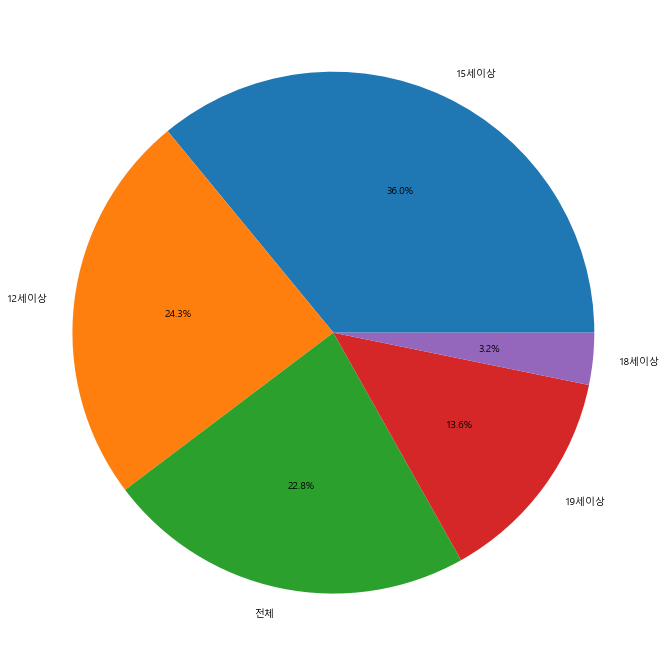

In [421]:
# 관람가
bar, ax = plt.subplots(figsize = (12,12))
plt.pie(movie['관람가'].value_counts(), labels = movie['관람가'].value_counts().index, autopct="%.1f%%")
pass

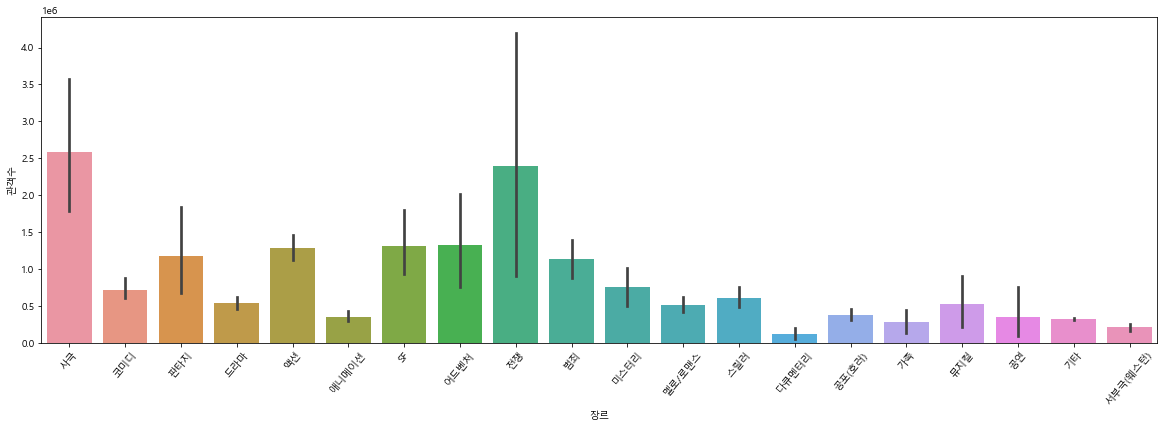

In [601]:
# 장르, 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie['장르'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

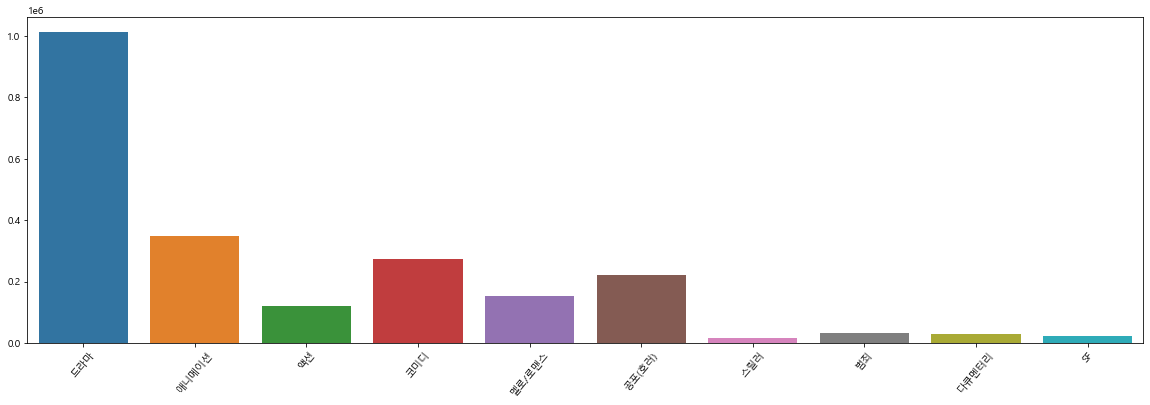

In [412]:
# 장르 관객수 상위10
plt.figure(figsize=(20,6))
sns.barplot(x=movie['장르'].value_counts().index[:10],y=movie['관객수'].value_counts().index[:10])
plt.xticks(rotation=50)
pass

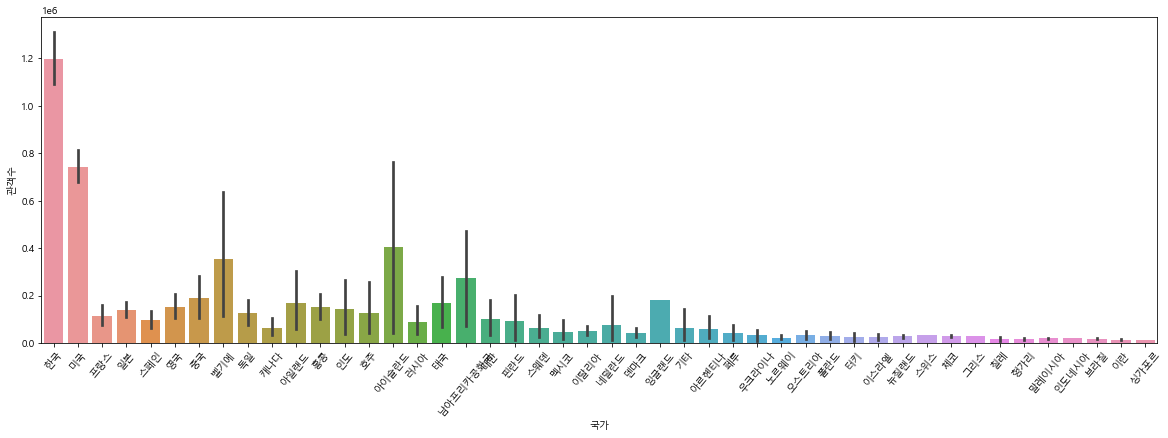

In [602]:
# 국가 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie['국가'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

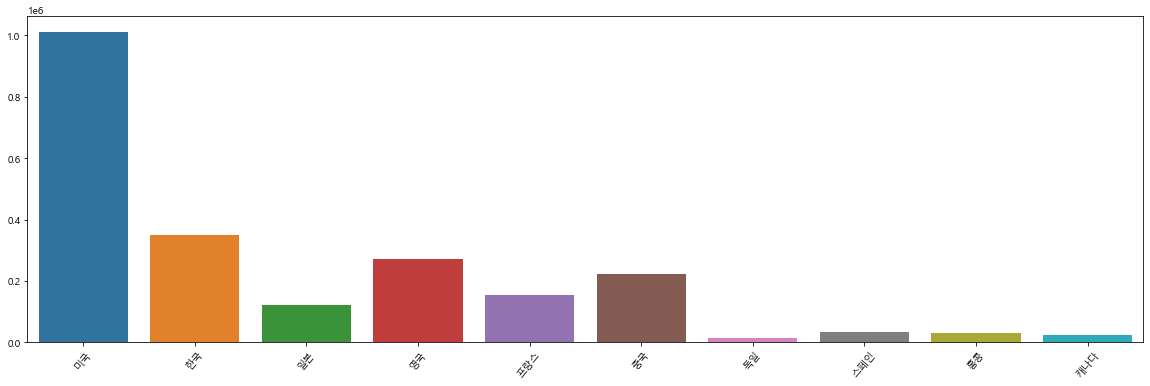

In [604]:
# 국가 관객수 상위10
plt.figure(figsize=(20,6))
sns.barplot(x=movie['국가'].value_counts().index[:10],y=movie['관객수'].value_counts().index[:10])
plt.xticks(rotation=50)
pass

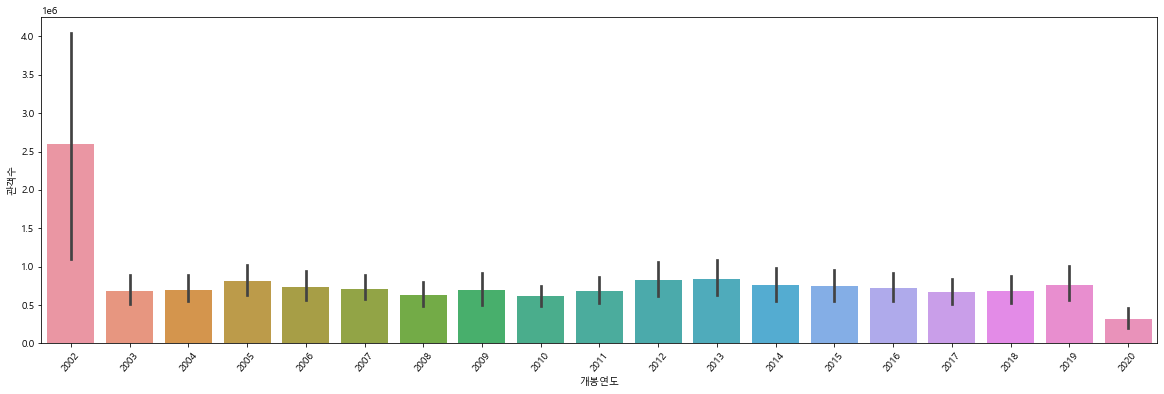

In [608]:
# 개봉연도 관객수
plt.figure(figsize=(20,6))
sns.barplot(x=movie['개봉연도'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

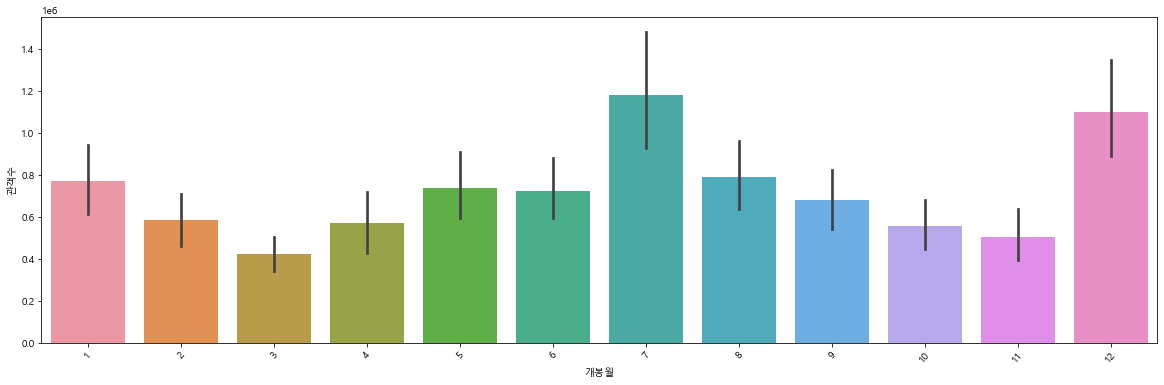

In [609]:
plt.figure(figsize=(20,6))
sns.barplot(x=movie['개봉월'],y=movie['관객수'])
plt.xticks(rotation=50)
pass

## 감독흥행작품수

In [505]:
director = movie[['감독','흥행']]
director_df = director.value_counts().to_frame()
director_df = director_df.reset_index()
director_df.rename(columns={0:'작품수'},inplace=True)

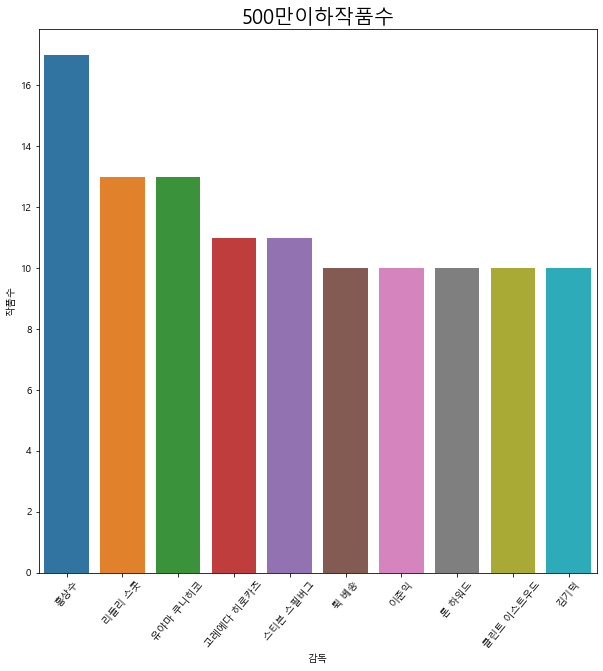

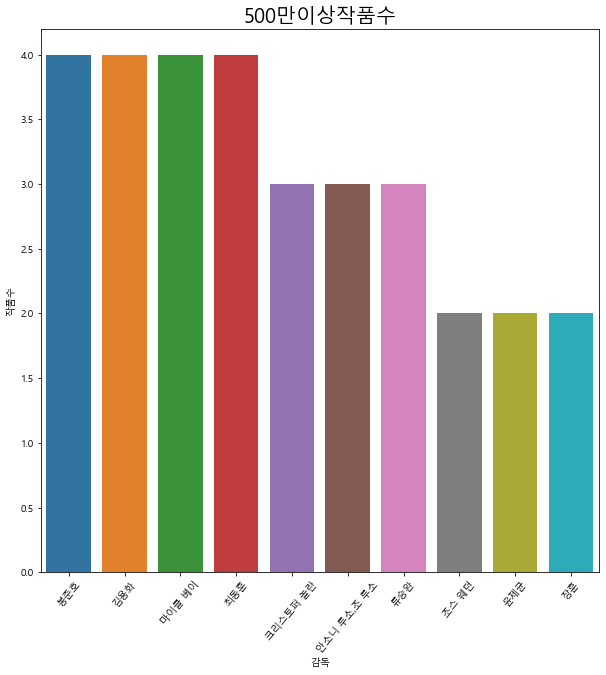

In [506]:
for i in director_df['흥행'].unique():
    bar, ax = plt.subplots(figsize=(10,10))
    sns.barplot(x = '감독', y = '작품수', data = director_df[director_df['흥행'] == i].iloc[:10])
    plt.ylabel('작품수')
    plt.title('{}작품수'.format(str(i)), size=20)
    plt.xticks(rotation=50)

In [678]:
# 알고리즘을 위해 int로
movie.loc[(movie.관객수 >= 5000000),'흥행'] = '1'
movie.loc[(movie.관객수 <= 5000000),'흥행'] = '0'
movie = movie.astype({'흥행':'int'})

In [658]:
movie.head()

,순위,영화명,감독,국가,스크린수,관객수,장르,관람가,개봉,개봉연도,개봉월,흥행
0,1,명량,김한민,한국,1587,17613682,사극,15세이상,2014-07-30,2014,7,1
1,2,극한직업,이병헌,한국,1978,16264944,코미디,15세이상,2019-01-23,2019,1,1
2,3,신과함께-죄와 벌,김용화,한국,1912,14410754,판타지,12세이상,2017-12-20,2017,12,1
3,4,국제시장,윤제균,한국,966,14245998,드라마,12세이상,2014-12-17,2014,12,1
4,5,어벤져스: 엔드게임(외국),"안소니 루소,조 루소",미국,2835,13934592,액션,12세이상,2019-04-24,2019,4,1


In [836]:
movie1 = movie.astype({'개봉연도':'str','개봉월':'str'})

In [657]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 0 to 4288
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      4289 non-null   int64         
 1   영화명     4289 non-null   object        
 2   감독      4289 non-null   object        
 3   국가      4289 non-null   object        
 4   스크린수    4289 non-null   int32         
 5   관객수     4289 non-null   int32         
 6   장르      4289 non-null   object        
 7   관람가     4289 non-null   object        
 8   개봉      4289 non-null   datetime64[ns]
 9   개봉연도    4289 non-null   int64         
 10  개봉월     4289 non-null   int64         
 11  흥행      4289 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(3), object(5)
memory usage: 545.3+ KB


# 머신러닝

In [845]:
movie_df = movie.drop(['순위','개봉','감독','영화명','스크린수'],axis=1)
movie_df

,국가,관객수,장르,관람가,개봉연도,개봉월,흥행
0,한국,17613682,사극,15세이상,2014,7,1
1,한국,16264944,코미디,15세이상,2019,1,1
2,한국,14410754,판타지,12세이상,2017,12,1
3,한국,14245998,드라마,12세이상,2014,12,1
4,미국,13934592,액션,12세이상,2019,4,1
...,...,...,...,...,...,...,...
4284,홍콩,10036,액션,15세이상,2006,3,0
4285,이탈리아,10031,드라마,12세이상,2015,8,0
4286,대만,10023,드라마,전체,2011,7,0
4287,미국,10021,드라마,15세이상,2019,6,0


In [846]:
movie_d = pd.get_dummies(movie_df)
movie_d

,관객수,개봉연도,개봉월,흥행,국가_그리스,국가_기타,국가_남아프리카공화국,국가_네덜란드,국가_노르웨이,국가_뉴질랜드,...,장르_액션,장르_어드벤처,장르_전쟁,장르_코미디,장르_판타지,관람가_12세이상,관람가_15세이상,관람가_18세이상,관람가_19세이상,관람가_전체
0,17613682,2014,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16264944,2019,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,14410754,2017,12,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,14245998,2014,12,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13934592,2019,4,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,10036,2006,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4285,10031,2015,8,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4286,10023,2011,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4287,10021,2019,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [847]:
y = movie_d['흥행']
x = movie_d.drop('흥행',axis=1)

## 패키지

In [882]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [862]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=111)

### StandardScaler

In [863]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [864]:
print(x_train_s.shape)
print(x_train.shape)

(3002, 74)
(3002, 74)


### LinearRegression

In [865]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)
pred_lr = lr.predict(x_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_lr))  #손실함수
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))  #평균제곱근오차
print('MAE:',metrics.mean_absolute_error(y_test,pred_lr))   #평균절대오차

MSE: 0.00927893209488657
RMSE: 0.09632721367758215
MAE: 0.04685174472748891


### LogisticRegression

In [885]:
log = LogisticRegression()
log.fit(x_train_s, y_train)
pred_log = log.predict(x_test_s)
pred_log_train = log.predict(x_train_s)
print('train정확도:',metrics.accuracy_score(pred_log_train, y_train))
print('test정확도:',metrics.accuracy_score(pred_log, y_test))
print(metrics.classification_report(pred_log, y_test))

train정확도: 0.9996668887408394
test정확도: 0.9968919968919969
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       0.91      0.97      0.94        30

    accuracy                           1.00      1287
   macro avg       0.95      0.98      0.97      1287
weighted avg       1.00      1.00      1.00      1287



### KneighborsClassifier

In [867]:
knn = KNeighborsClassifier()
knn.fit(x_train_s,y_train)
knn_pred = knn.predict(x_test_s)
knn_pred_train = knn.predict(x_train_s)
print('train정확도:',metrics.accuracy_score(knn_pred_train,y_train))
print('test정확도:',metrics.accuracy_score(knn_pred,y_test))
print(metrics.classification_report(knn_pred,y_test))

train정확도: 0.9906728847435043
test정확도: 0.9891219891219891
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1269
           1       0.56      1.00      0.72        18

    accuracy                           0.99      1287
   macro avg       0.78      0.99      0.86      1287
weighted avg       0.99      0.99      0.99      1287



### SVC

In [868]:
svc = SVC()
svc.fit(x_train_s,y_train)
svc_pred = svc.predict(x_test_s)
svc_pred_train = svc.predict(x_train_s)
print('train정확도:',metrics.accuracy_score(svc_pred_train,y_train))
print('test정확도:',metrics.accuracy_score(svc_pred,y_test))
print(metrics.classification_report(svc_pred,y_test))

train정확도: 0.9936708860759493
test정확도: 0.993006993006993
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1264
           1       0.72      1.00      0.84        23

    accuracy                           0.99      1287
   macro avg       0.86      1.00      0.92      1287
weighted avg       0.99      0.99      0.99      1287



### XGBClassifier

In [869]:
xg = XGBClassifier()
xg.fit(x_train_s, y_train)
pred_xg_train = xg.predict(x_train_s)
pred_xg = xg.predict(x_test_s)
print('train정확도:',metrics.accuracy_score(pred_xg_train,y_train))
print('test정확도:',metrics.accuracy_score(pred_xg,y_test))
print(metrics.classification_report(pred_xg,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train정확도: 1.0
test정확도: 0.9984459984459985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      0.94      0.97        34

    accuracy                           1.00      1287
   macro avg       1.00      0.97      0.98      1287
weighted avg       1.00      1.00      1.00      1287



### LGBMClassifier

In [870]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_s, y_train)
pred_lgbm=lgbm.predict(x_test_s)
pred_lgbm_train=lgbm.predict(x_train_s)
print('train정확도:',metrics.accuracy_score(pred_lgbm_train,y_train))
print('test정확도:',metrics.accuracy_score(pred_lgbm,y_test))
print(metrics.classification_report(y_test,pred_lgbm))

train정확도: 1.0
test정확도: 0.9984459984459985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       0.97      0.97      0.97        32

    accuracy                           1.00      1287
   macro avg       0.98      0.98      0.98      1287
weighted avg       1.00      1.00      1.00      1287



### DecisionTreeClassifier

In [871]:
dt = DecisionTreeClassifier()
dt.fit(x_train_s,y_train)
dt_pred = dt.predict(x_test_s)
dt_pred_train = dt.predict(x_train_s)
print('train정확도',metrics.accuracy_score(dt_pred_train,y_train))
print('test정확도:',metrics.accuracy_score(dt_pred,y_test))
print(metrics.classification_report(dt_pred,y_test))

train정확도 1.0
test정확도: 0.9984459984459985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      0.94      0.97        34

    accuracy                           1.00      1287
   macro avg       1.00      0.97      0.98      1287
weighted avg       1.00      1.00      1.00      1287



### RandomForestClassifier

In [872]:
rfc = RandomForestClassifier()
rfc.fit(x_train_s,y_train)
rfc_pred = rfc.predict(x_test_s)
rfc_pred_train = rfc.predict(x_train_s)
print('train정확도:',metrics.accuracy_score(rfc_pred_train,y_train))
print('test정확도:',metrics.accuracy_score(rfc_pred,y_test))
print(metrics.classification_report(rfc_pred,y_test))

train정확도: 1.0
test정확도: 0.9961149961149961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       0.88      0.97      0.92        29

    accuracy                           1.00      1287
   macro avg       0.94      0.98      0.96      1287
weighted avg       1.00      1.00      1.00      1287



### xgboost

In [873]:
xg = XGBClassifier()
xg.fit(x_train_s, y_train)
pred_xg_train = xg.predict(x_train_s)
pred_xg = xg.predict(x_test_s)
print('train정확도:',metrics.accuracy_score(pred_xg_train,y_train))
print('test정확도:',metrics.accuracy_score(pred_xg,y_test))
print(metrics.classification_report(pred_xg,y_test))

[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train정확도: 1.0
test정확도: 0.9984459984459985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      0.94      0.97        34

    accuracy                           1.00      1287
   macro avg       1.00      0.97      0.98      1287
weighted avg       1.00      1.00      1.00      1287

